In [1]:
import numpy as np
import PIL.Image
import torch

import dnnlib
import legacy
from wrapper import Generator

import os
os.chdir('..')

In [2]:
device = torch.device('cuda:0')
ckpt = 'pretrained/ffhq.pkl'
G = Generator(ckpt, device)

In [3]:
seed = 1

In [4]:
z = torch.from_numpy(np.random.RandomState(seed).randn(1, G.G.z_dim)).to(device)
z.shape

torch.Size([1, 512])

In [5]:
#ws = G.mapping(z)
ws = G.mapping(z, truncation_psi=0.7, truncation_cutoff=8)

Setting up PyTorch plugin "bias_act_plugin"... Done.


In [6]:
# synthesis image from latent space W
synth1 = G.synthesis(ws)

Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


In [7]:
synth1 = (synth1.permute(0,2,3,1)*127.5+128).clamp(0,255).to(torch.uint8)

In [8]:
# W -> S
styles = G.mapping_stylespace(ws)

In [9]:
# synthesis image from style space S
synth2 = G.synthesis_from_stylespace(ws, styles)

In [10]:
synth2 = (synth2.permute(0,2,3,1)*127.5+128).clamp(0,255).to(torch.uint8)

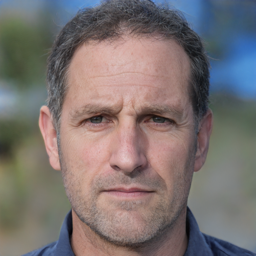

In [11]:
PIL.Image.fromarray(synth1[0].cpu().numpy(),'RGB').resize((256,256))

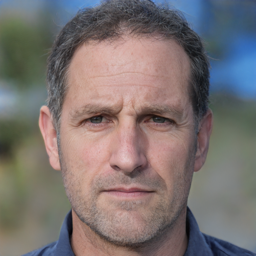

In [12]:
PIL.Image.fromarray(synth2[0].cpu().numpy(),'RGB').resize((256,256))